In [5]:
import pickle
with open("./performance_scores.pkl", "rb") as f:
    dictv= pickle.load(f)
dictv

{1: {'og_forg': 0.0,
  'og_util': 0.014705882352941176,
  'poison_forg': 0.0,
  'poison_util': 0.014705882352941176,
  'unlearn_forg': 0.7019566736547869,
  'unlearn_util': 0.5629841949474299},
 50: {'og_forg': 0.0,
  'og_util': 0.014705882352941176,
  'poison_forg': 0.0,
  'poison_util': 0.02905740609496811,
  'unlearn_forg': 0.7019566736547869,
  'unlearn_util': 0.5603067579344947},
 100: {'og_forg': 0.25471698113207547,
  'og_util': 0.09279544057319071,
  'poison_forg': 0.04716981132075472,
  'poison_util': 0.18655913643852085,
  'unlearn_forg': 0.7019566736547869,
  'unlearn_util': 0.5587785734728298},
 200: {'og_forg': 0.4325646401118099,
  'og_util': 0.3294293499155174,
  'poison_forg': 0.1310272536687631,
  'poison_util': 0.4094830679098071,
  'unlearn_forg': 0.7019566736547869,
  'unlearn_util': 0.5595501205139185},
 300: {'og_forg': 0.5997554157931517,
  'og_util': 0.45597763064547503,
  'poison_forg': 0.23287910552061497,
  'poison_util': 0.4788768872208819,
  'unlearn_forg':

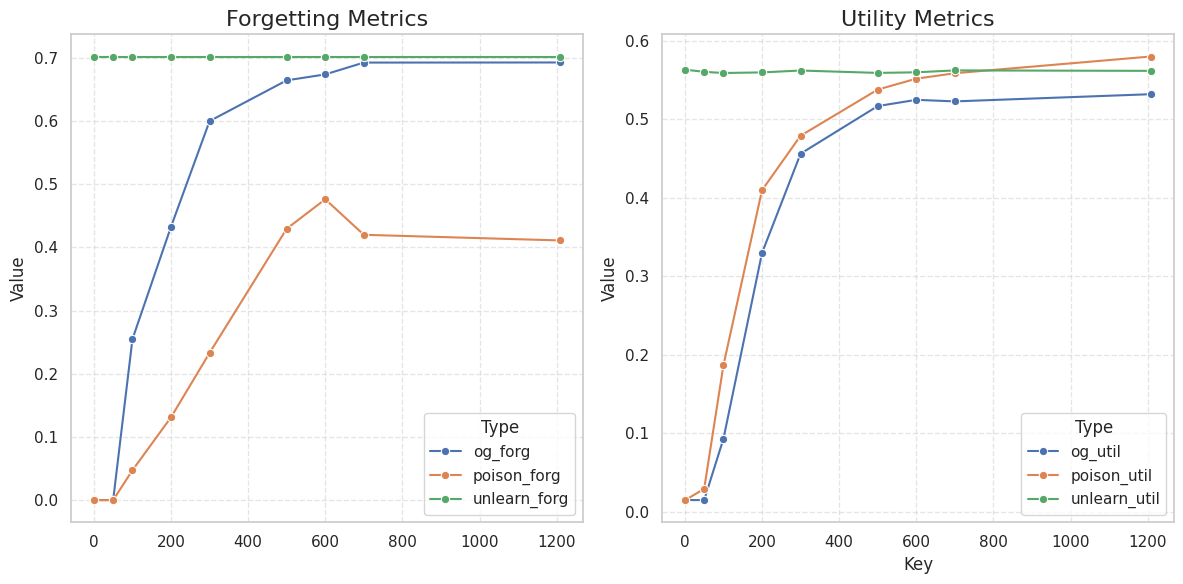

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = dictv

# Convert to DataFrame
df = pd.DataFrame(data).T.reset_index().rename(columns={"index": "x_axis"})

df_forg = df.melt(id_vars="x_axis", value_vars=["og_forg", "poison_forg", "unlearn_forg"], var_name="type", value_name="value")
df_util = df.melt(id_vars="x_axis", value_vars=["og_util", "poison_util", "unlearn_util"], var_name="type", value_name="value")

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

sns.lineplot(data=df_forg, x="x_axis", y="value", hue="type", marker="o", ax=axes[0])
axes[0].set_title("Forgetting Metrics", fontsize=16)
axes[0].set_ylabel("Value", fontsize=12)
axes[0].set_xlabel("")
axes[0].legend(title="Type", loc="lower right")
axes[0].grid(True, linestyle="--", alpha=0.5)

sns.lineplot(data=df_util, x="x_axis", y="value", hue="type", marker="o", ax=axes[1])
axes[1].set_title("Utility Metrics", fontsize=16)
axes[1].set_ylabel("Value", fontsize=12)
axes[1].set_xlabel("Key", fontsize=12)
axes[1].legend(title="Type", loc="lower right")
axes[1].grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()